In [14]:
from __future__ import division
import cv2
import os
import time
import warnings
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from scipy.signal import gaussian
import scipy.ndimage as ndi

from skimage import io,util
from scipy.signal import wiener
from skimage import io
from skimage import transform
from skimage.transform import rotate 
from skimage import exposure
from scipy import ndimage
from butterworth import Butter
from scipy.signal import butter, lfilter

from numpy.fft import fft, fft2, fftshift
import skimage.transform as tr

warnings.filterwarnings('ignore')

In [15]:
# establish a folder named LAB4
path = "LAB8"
if not os.path.isdir(path):
    os.mkdir(path)

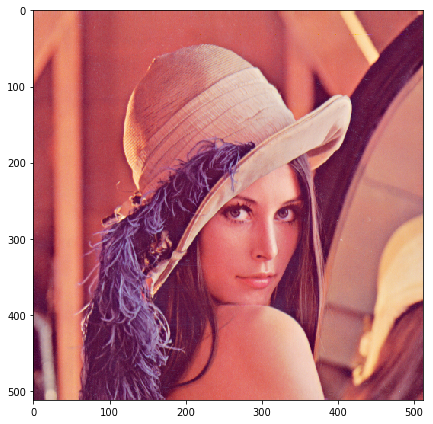

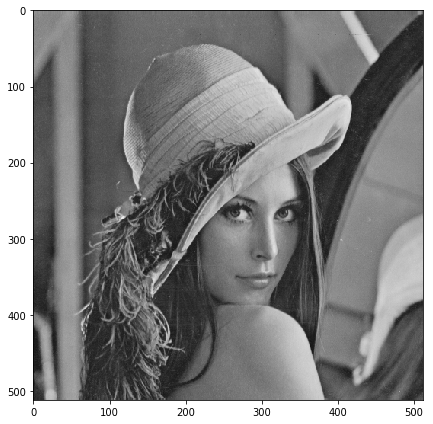

In [38]:
# show the RGB picture
imgRGB = io.imread('lena.png')
plt.figure(figsize=(15,6)) 
io.imshow(imgRGB)
io.imsave('LAB8/lenaRGB.jpg', imgRGB)

# show the gray picture
imgGray = cv2.cvtColor(imgRGB,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,6)) 
io.imshow(imgGray, cmap = 'gray')
io.imsave('LAB8/lenaGray.jpg', imgGray)

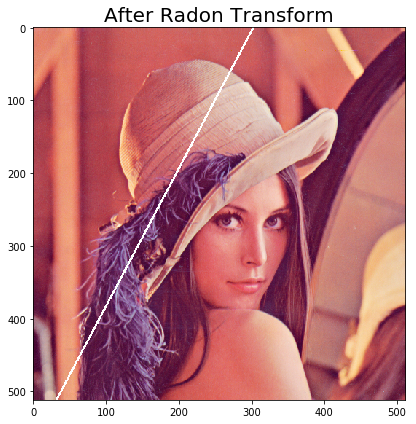

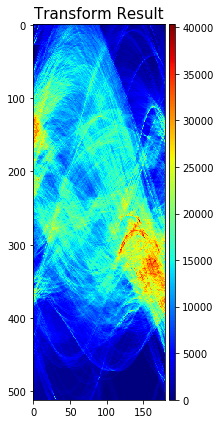

In [50]:
# Radon Transform
imgRGB = io.imread('lena.png')
imgGray = cv2.cvtColor(imgRGB,cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(imgRGB,50, 200)
rad = tr.radon(edges)
r, theta = np.where(rad == np.max(rad[:]))

for i in range(r.shape[0]):
    a = np.cos(theta[i])
    b = np.sin(theta[i])
    x0 = a*r[i]
    y0 = b*r[i]
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(imgRGB,(x1,y1),(x2,y2),(255,255,255),2)
    
plt.figure(figsize=(15,6)) 
plt.title('After Radon Transform', fontsize = '20')
io.imshow(imgRGB)

plt.figure(figsize=(15,6)) 
plt.title('Transform Result', fontsize = '15')
io.imshow(rad, cmap = 'jet')

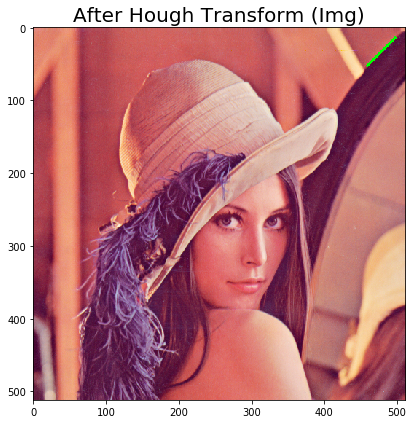

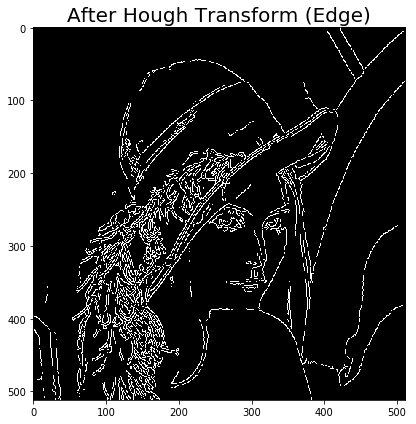

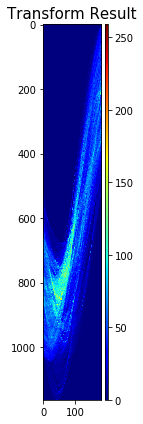

In [51]:
# Hough Transform
imgRGB = io.imread('lena.png')
imgGray = cv2.cvtColor(imgRGB,cv2.COLOR_BGR2GRAY)

gray = cv2.cvtColor(imgRGB,cv2.COLOR_BGR2GRAY)
gaus = cv2.GaussianBlur(gray,(3,3),0)
edges = cv2.Canny(gaus, 50, 150, apertureSize=3)
 
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength, maxLineGap)
 
for x1, y1, x2, y2 in lines[0]:
    cv2.line(imgRGB, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
plt.figure(figsize=(15,6)) 
plt.title('After Hough Transform (Img)', fontsize = '20')
io.imshow(imgRGB, cmap = 'gray')    

plt.figure(figsize=(15,6)) 
plt.title('After Hough Transform (Edge)', fontsize = '20')
io.imshow(edges, cmap = 'gray')

plt.figure(figsize=(15,6)) 
plt.title('Transform Result', fontsize = '15')
io.imshow(hough, cmap = 'jet')

# From https://blog.csdn.net/dcrmg/article/details/78880046